In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os


In [2]:
# Importing the dataset
df = pd.read_csv('covid_2021_1.csv')
df


,query,url,title,upload_date,channel,views,likes,dislikes,comment_count,comment_text,comment_author,comment_date,comment_likes,DATE
0,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,OMG 😍💋 💝💖❤️,Brendan Eric,2021-01-01T09:23:59Z,0,2021-01-01 09:04:16+00:00
1,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,I love my Indian Mumbai me welcome,Bhallesingh Rathore rathore,2021-01-01T09:06:51Z,1,2021-01-01 09:04:16+00:00
2,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,What about indian vaccine?,Kudip singh hong kong.,2021-02-03T08:17:14Z,0,2021-01-01 09:04:16+00:00
3,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,2:32 I like that😍💋 💝💖❤️,Bo Brice,2021-01-01T09:55:34Z,0,2021-01-01 09:04:16+00:00
4,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=dwMWM1F7NMI,Growing Number Of Americans Going Hungry Durin...,2021-01-01T11:59:49Z,NBC News,74546,874,62,601,And all the rich companies that have profited ...,Poppy Jalto,2021-01-01T13:17:56Z,93,2021-01-01 11:59:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41583,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Thanks da,Urmila Vichare,2021-01-30T05:04:34Z,1,2021-01-30 04:27:07+00:00
41584,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,👍👍 very helpful information,Bhagya and Mumma,2021-01-31T05:39:23Z,2,2021-01-30 04:27:07+00:00
41585,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,👍,Rushali Bakarekar,2021-02-01T08:50:00Z,1,2021-01-30 04:27:07+00:00
41586,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Very very much informative vlog..Sunny da ne v...,Madhuri Sonavane,2021-01-30T04:45:07Z,1,2021-01-30 04:27:07+00:00


In [3]:
#Exploratory Data Analysis
df.head()#displaying first 5 rows of the dataset


,query,url,title,upload_date,channel,views,likes,dislikes,comment_count,comment_text,comment_author,comment_date,comment_likes,DATE
0,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,OMG 😍💋 💝💖❤️,Brendan Eric,2021-01-01T09:23:59Z,0,2021-01-01 09:04:16+00:00
1,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,I love my Indian Mumbai me welcome,Bhallesingh Rathore rathore,2021-01-01T09:06:51Z,1,2021-01-01 09:04:16+00:00
2,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,What about indian vaccine?,Kudip singh hong kong.,2021-02-03T08:17:14Z,0,2021-01-01 09:04:16+00:00
3,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=LyRoIKjmk9o,Which Coronavirus Vaccine Is More Effective? C...,2021-01-01T09:04:16Z,India Today,8276,58,7,5,2:32 I like that😍💋 💝💖❤️,Bo Brice,2021-01-01T09:55:34Z,0,2021-01-01 09:04:16+00:00
4,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=dwMWM1F7NMI,Growing Number Of Americans Going Hungry Durin...,2021-01-01T11:59:49Z,NBC News,74546,874,62,601,And all the rich companies that have profited ...,Poppy Jalto,2021-01-01T13:17:56Z,93,2021-01-01 11:59:49+00:00


In [4]:
df.tail()# displaying last 5 rows of dataset

,query,url,title,upload_date,channel,views,likes,dislikes,comment_count,comment_text,comment_author,comment_date,comment_likes,DATE
41583,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Thanks da,Urmila Vichare,2021-01-30T05:04:34Z,1,2021-01-30 04:27:07+00:00
41584,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,👍👍 very helpful information,Bhagya and Mumma,2021-01-31T05:39:23Z,2,2021-01-30 04:27:07+00:00
41585,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,👍,Rushali Bakarekar,2021-02-01T08:50:00Z,1,2021-01-30 04:27:07+00:00
41586,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Very very much informative vlog..Sunny da ne v...,Madhuri Sonavane,2021-01-30T04:45:07Z,1,2021-01-30 04:27:07+00:00
41587,coronavirus|covid%7C19|pandemic|vaccine,https://www.youtube.com/watch?v=nBFln3cAnUk,War Against Corona Virus |Coronavirudh Mahayud...,2021-01-30T04:27:07Z,Rachana’s NavAngel World,26087,1140,47,91,Thanking you for this information,Snehal Dhumal,2021-01-31T06:36:39Z,2,2021-01-30 04:27:07+00:00


In [5]:
#find shape of the dataset(number of rows and columns)
df.shape

(41588, 14)

In [7]:
#Columns/features in data
df.columns

Index(['query', 'url', 'title', 'upload_date', 'channel', 'views', 'likes',
       'dislikes', 'comment_count', 'comment_text', 'comment_author',
       'comment_date', 'comment_likes', 'DATE'],
      dtype='object')

In [8]:
#finding null values
df.isna().sum()# null values

query             0
url               0
title             0
upload_date       0
channel           0
views             0
likes             0
dislikes          0
comment_count     0
comment_text      0
comment_author    0
comment_date      0
comment_likes     0
DATE              0
dtype: int64

In [9]:
#getting the information about the dataset(number of rows and columns,data types of each column and memory requiremeent)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41588 entries, 0 to 41587
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   query           41588 non-null  object
 1   url             41588 non-null  object
 2   title           41588 non-null  object
 3   upload_date     41588 non-null  object
 4   channel         41588 non-null  object
 5   views           41588 non-null  int64 
 6   likes           41588 non-null  int64 
 7   dislikes        41588 non-null  int64 
 8   comment_count   41588 non-null  int64 
 9   comment_text    41588 non-null  object
 10  comment_author  41588 non-null  object
 11  comment_date    41588 non-null  object
 12  comment_likes   41588 non-null  int64 
 13  DATE            41588 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.4+ MB


In [10]:
df.nunique()

query                 1
url                 895
title               892
upload_date         894
channel             395
views               885
likes               539
dislikes            322
comment_count       412
comment_text      40094
comment_author    34869
comment_date      41209
comment_likes       656
DATE                894
dtype: int64

In [11]:
df.columns

Index(['query', 'url', 'title', 'upload_date', 'channel', 'views', 'likes',
       'dislikes', 'comment_count', 'comment_text', 'comment_author',
       'comment_date', 'comment_likes', 'DATE'],
      dtype='object')

In [12]:
#find unique values present in the column 'comment_text'
df.comment_text.unique()

array(['OMG 😍💋 💝💖❤️', 'I love my Indian Mumbai me welcome',
       'What about indian vaccine?', ..., '👍👍 very helpful information',
       'Very very much informative vlog..Sunny da ne vaccine baddal jo experience share kela aahe tya baddal khup afwa samaj gairsamaj hote te sarv dur zale astil jyanna pn astil..khup deep mdhe right from to go for vaccine till any side effects preacautions prynt sarv kahi khup chhan explain kel aahe.. Thnk u so much Dr.Sunny da..god bless u',
       'Thanking you for this information'], dtype=object)

In [13]:
#find value counts
df['comment_text'].value_counts()

Vaccine manufacturers have   ZERO LIABILITY   In case of injury or death caused by vaccines                    32
Nice                                                                                                           30
Good                                                                                                           24
👍                                                                                                              21
First                                                                                                          18
                                                                                                               ..
RepIace China with lndia at UN Security CounciI                                                                 1
China giving out viruses and India giving out vaccines and still people say India is a third world country.     1
I'm proud of my motherland 🙏                                                            

In [14]:
df['comment_text'].nunique() #to count the number of unique (distinct) values

40094

# Data Cleaning and Preprocessing

In [25]:
df['comment_text'] = df['comment_text'].str.replace("[^a-zA-Z#]", " ")# remove special characters and numbers

In [26]:
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))#clean the comments by removing short words (those with 3 or fewer characters)

In [27]:
df['comment_text'] = df['comment_text'].apply(lambda x:x.lower())# convert to lowercase

In [28]:
tokenized_comments = df['comment_text'].apply(lambda x: x.split())#tokenize each comment in the comment_text
tokenized_comments.head()

0                                                   []
1                      [love, indian, mumbai, welcome]
2                       [what, about, indian, vaccine]
3                                         [like, that]
4    [rich, companies, that, have, profited, from, ...
Name: comment_text, dtype: object

# Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [30]:
wnl = WordNetLemmatizer()

In [31]:
#lemmatize words in tokenized comments and remove stopwords
tokenized_comments.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_comments.head()

0                                                   []
1                      [love, indian, mumbai, welcome]
2                       [what, about, indian, vaccine]
3                                         [like, that]
4    [rich, companies, that, have, profited, from, ...
Name: comment_text, dtype: object

In [32]:
# convert lists of tokens (words) back into strings of text.
for i in range(len(tokenized_comments)):
    tokenized_comments[i] = ' '.join(tokenized_comments[i])

In [33]:
df['comment_text'] = tokenized_comments

# Sentiment Analysis 

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\APPUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

In [36]:
#Setting The Sentiment Scores
df['Sentiment Scores'] = df['comment_text'].apply(lambda x:senti.polarity_scores(x)['compound'])

In [37]:
df.head

<bound method NDFrame.head of                                          query  \
0      coronavirus|covid%7C19|pandemic|vaccine   
1      coronavirus|covid%7C19|pandemic|vaccine   
2      coronavirus|covid%7C19|pandemic|vaccine   
3      coronavirus|covid%7C19|pandemic|vaccine   
4      coronavirus|covid%7C19|pandemic|vaccine   
...                                        ...   
41583  coronavirus|covid%7C19|pandemic|vaccine   
41584  coronavirus|covid%7C19|pandemic|vaccine   
41585  coronavirus|covid%7C19|pandemic|vaccine   
41586  coronavirus|covid%7C19|pandemic|vaccine   
41587  coronavirus|covid%7C19|pandemic|vaccine   

                                               url  \
0      https://www.youtube.com/watch?v=LyRoIKjmk9o   
1      https://www.youtube.com/watch?v=LyRoIKjmk9o   
2      https://www.youtube.com/watch?v=LyRoIKjmk9o   
3      https://www.youtube.com/watch?v=LyRoIKjmk9o   
4      https://www.youtube.com/watch?v=dwMWM1F7NMI   
...                                          

In [38]:
#Classifying the Sentiment scores as Positive, Negative and Neutral
df['Sentiment'] = df['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [39]:
df.head

<bound method NDFrame.head of                                          query  \
0      coronavirus|covid%7C19|pandemic|vaccine   
1      coronavirus|covid%7C19|pandemic|vaccine   
2      coronavirus|covid%7C19|pandemic|vaccine   
3      coronavirus|covid%7C19|pandemic|vaccine   
4      coronavirus|covid%7C19|pandemic|vaccine   
...                                        ...   
41583  coronavirus|covid%7C19|pandemic|vaccine   
41584  coronavirus|covid%7C19|pandemic|vaccine   
41585  coronavirus|covid%7C19|pandemic|vaccine   
41586  coronavirus|covid%7C19|pandemic|vaccine   
41587  coronavirus|covid%7C19|pandemic|vaccine   

                                               url  \
0      https://www.youtube.com/watch?v=LyRoIKjmk9o   
1      https://www.youtube.com/watch?v=LyRoIKjmk9o   
2      https://www.youtube.com/watch?v=LyRoIKjmk9o   
3      https://www.youtube.com/watch?v=LyRoIKjmk9o   
4      https://www.youtube.com/watch?v=dwMWM1F7NMI   
...                                          

In [40]:
df.Sentiment.value_counts()

Positive    17219
Neutral     15510
Negative     8859
Name: Sentiment, dtype: int64

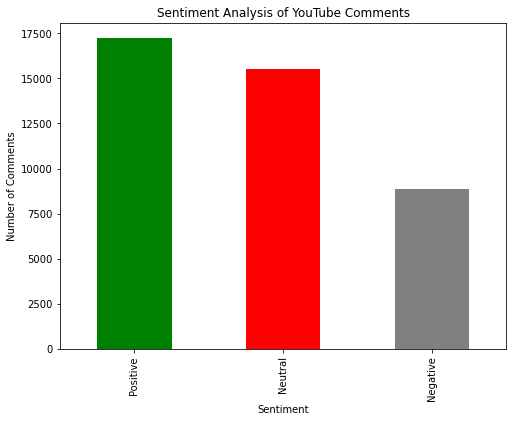

In [44]:
# Plotting count of sentiments
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

#Let's Contstruct a wordcloud of all the comments to see the most frequent comments.

In [45]:
font_path = 'C:\Windows\Fonts\georgiab.ttf'

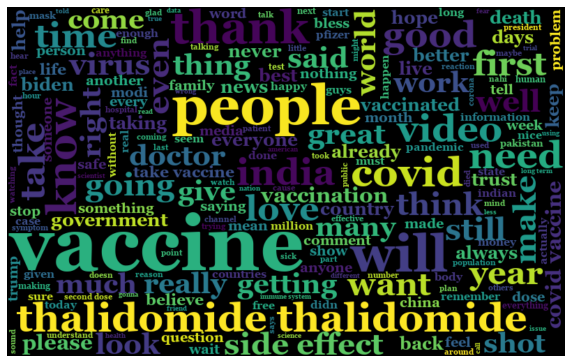

In [46]:
all_words = ' '.join([text for text in df['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, font_path=font_path).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [47]:
#Construct a Wordcloud of Positive Comments
all_words_positive = ' '.join([text for text in df['comment_text'][df.Sentiment == 'Positive']])

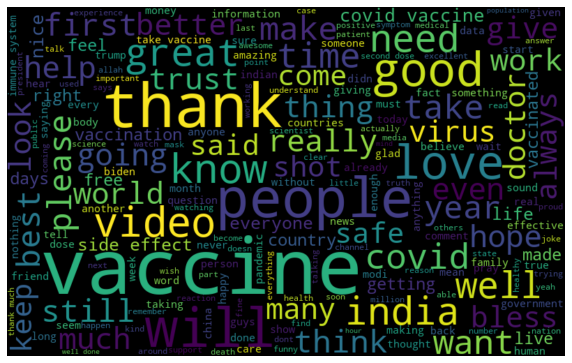

In [48]:
wordcloud_positive = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_positive)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
#Construct a Wordcloud of Negative Comments
all_words_negative = ' '.join([text for text in df['comment_text'][df.Sentiment == 'Negative']])

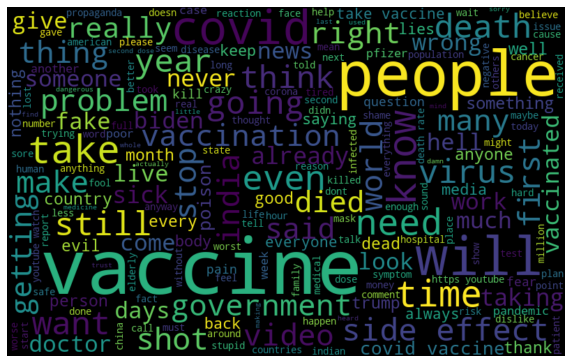

In [50]:
wordcloud_negative = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_negative)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
#Contsruct a Wordcloud of Neutral Comments
all_words_neutral = ' '.join([text for text in df['comment_text'][df.Sentiment == 'Neutral']])

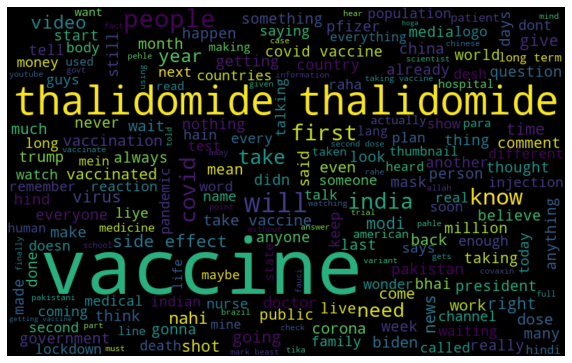

In [52]:
wordcloud_neutral = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neutral)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

In [69]:
comments=df['comment_text']

In [57]:
X = df['comment_text']  # Input features
y = df['Sentiment']     # Labels


In [ ]:
#Splitting Our Data Into Train and Test Subsets

In [58]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()
# Fit and transform the comments
X = vectorizer.fit_transform(comments)


In [71]:
# Convert the TF-IDF matrix to a DataFrame for better readability
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [72]:
# Display the TF-IDF matrix
print(df_tfidf)

       aaaa  aaaaaara  aaaaahhhh  aaaaand  aaaand  aaammmeeen  aaaya  \
0       0.0       0.0        0.0      0.0     0.0         0.0    0.0   
1       0.0       0.0        0.0      0.0     0.0         0.0    0.0   
2       0.0       0.0        0.0      0.0     0.0         0.0    0.0   
3       0.0       0.0        0.0      0.0     0.0         0.0    0.0   
4       0.0       0.0        0.0      0.0     0.0         0.0    0.0   
...     ...       ...        ...      ...     ...         ...    ...   
41583   0.0       0.0        0.0      0.0     0.0         0.0    0.0   
41584   0.0       0.0        0.0      0.0     0.0         0.0    0.0   
41585   0.0       0.0        0.0      0.0     0.0         0.0    0.0   
41586   0.0       0.0        0.0      0.0     0.0         0.0    0.0   
41587   0.0       0.0        0.0      0.0     0.0         0.0    0.0   

       aabangan  aabhari  aabot  ...  zutgtespvea  zvestobo  zweitrangig  \
0           0.0      0.0    0.0  ...          0.0       0.0

In [74]:
# Initialize the TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)

# Fit the vectorizer
vectoriser.fit(X_train)

# Get the number of feature words
num_features = len(vectoriser.get_feature_names_out())
print('No. of feature_words: ', num_features)

No. of feature_words:  267025


In [75]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

#After training the model, we then apply the evaluation measures to check how the model is performing. Accordingly, we use the accuaracy to check the performance of the models respectively:


In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [93]:
# Initialize the model
model1 = BernoulliNB()

# Train the model
model1.fit(X_train, y_train)

# Predict on test data
y_pred = model1.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    Negative       0.80      0.08      0.14       425
     Neutral       0.56      0.96      0.70       802
    Positive       0.71      0.55      0.62       853

    accuracy                           0.61      2080
   macro avg       0.69      0.53      0.49      2080
weighted avg       0.67      0.61      0.55      2080



In [95]:
# Initialize the model
model2 = LogisticRegression()

# Train the model
model2.fit(X_train, y_train)

# Predict on test data
y_pred = model2.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.83      0.71      0.77       425
     Neutral       0.87      0.90      0.89       802
    Positive       0.87      0.90      0.88       853

    accuracy                           0.86      2080
   macro avg       0.86      0.84      0.85      2080
weighted avg       0.86      0.86      0.86      2080



In [100]:
# Initialize the model
model3 = LinearSVC()

# Train the model
model3.fit(X_train, y_train)

# Predict on test data
y_pred = model3.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    Negative       0.87      0.79      0.83       425
     Neutral       0.92      0.94      0.93       802
    Positive       0.91      0.92      0.91       853

    accuracy                           0.90      2080
   macro avg       0.90      0.89      0.89      2080
weighted avg       0.90      0.90      0.90      2080

